In [1]:
import math
import pandas as pd
import random
import seaborn as sns
import statistics as stats
import warnings

In [2]:
## Uncomment and run this cell to reset the state and get reproducible results
# random.seed(a="seed dated: 2020-07-23")

In [3]:
# Code for configuration of global parameters
# pd.options.display.max_columns = None
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# The number of trials for each value of k
trials = 250

In [5]:
def min_max(a, b, c):
    """
    Returns the maximum possible and the minimum possible root from
    the given parameters. It returns None if no real roots exist.
    """
    # We must have a quadratic equation
    if a == 0:
        return None
    
    dsquared = b * b - 4 * a * c
    
    # We only consider real roots
    if dsquared < 0:
        return None
    
    d = math.sqrt(dsquared)
    twoa = 2 * a
    minroot = (-b - d) / twoa
    maxroot = (-b + d) / twoa
    return (minroot, maxroot)

In [6]:
def get_random_value(k):
    """
    Return a random integer in the range [1, k].
    (1 and k are inclusive.)
    """
    return random.randrange(1, k+1)

In [7]:
def get_row_of_data_for(k):
    """
    Returns a row of data by performing an experiment for the given
    value of k. The values returned are:
    1. k
    2. Mean of the maximum roots
    3. Mean of the minimum roots
    4. Std dev of the maximum roots
    5. Std dev of the minimum roots
    """
    max_roots = []
    min_roots = []

    for current_trial in range(trials):
        # We loop until we get valid roots
        roots = None
        while roots is None:
            a = get_random_value(k)
            b = get_random_value(k)
            c = get_random_value(k)

            roots = min_max(a, b, c)

        # unpack the data
        minroot, maxroot = roots
        max_roots.append(maxroot)
        min_roots.append(minroot)
    
    return [
        k,
        stats.mean(max_roots), stats.mean(min_roots),
        stats.stdev(max_roots), stats.stdev(min_roots)
    ]

In [8]:
data = [get_row_of_data_for(k) for k in range(100, 2001, 100)]

In [9]:
df = pd.DataFrame(
    data, columns=[
        "k",
        "Mean of the maximum roots",
        "Mean of the minimum roots",
        "Std dev of the maximum roots",
        "Std dev of the minimum roots",
    ]
)
df

,k,Mean of the maximum roots,Mean of the minimum roots,Std dev of the maximum roots,Std dev of the minimum roots
0,100,-0.534401,-6.011835,0.597342,11.399861
1,200,-0.500269,-7.660671,0.478825,19.391076
2,300,-0.649450,-8.079032,0.772106,15.192658
3,400,-0.518595,-9.448200,0.525458,21.360517
4,500,-0.532427,-10.931805,0.522977,27.211872
5,600,-0.562255,-9.368138,0.540007,29.117706
6,700,-0.626214,-13.288464,1.024465,56.238535
7,800,-0.557287,-7.570118,0.535645,23.848145
8,900,-0.588721,-9.783992,0.553441,39.378028
9,1000,-0.527589,-11.463461,0.532302,58.023522


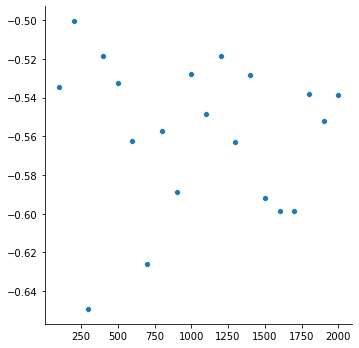

In [10]:
try:
    sns.relplot(x=df["k"],y=df["Mean of the maximum roots"],data=df)
except:
    pass

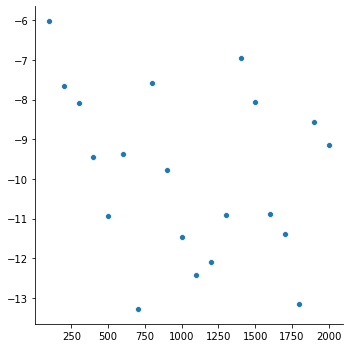

In [11]:
try:
    sns.relplot(x=df["k"],y=df["Mean of the minimum roots"],data=df)
except:
    pass

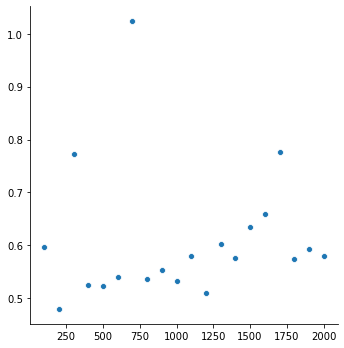

In [12]:
try:
    sns.relplot(x=df["k"],y=df["Std dev of the maximum roots"],data=df)
except:
    pass

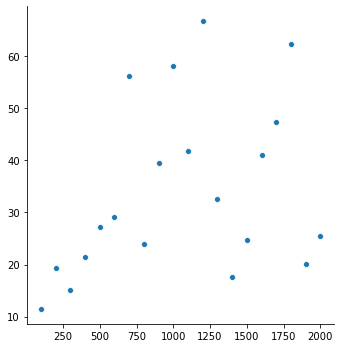

In [13]:
try:
    sns.relplot(x=df["k"],y=df["Std dev of the minimum roots"],data=df)
except:
    pass